In [16]:
### Loading in libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("./sales_data.csv")
df.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


# EDA

In [13]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract additional features from the 'Date' column if necessary (e.g., day of the week, month, year)
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

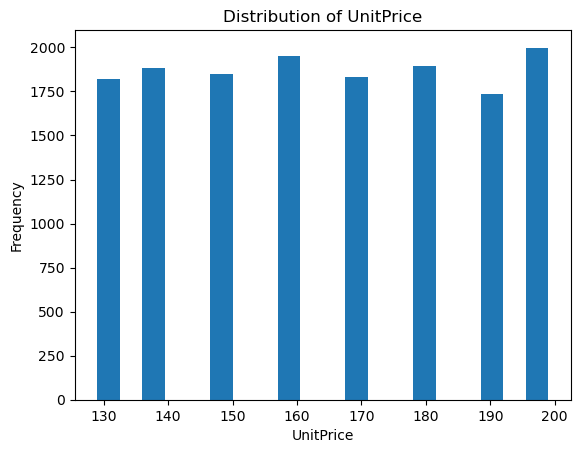

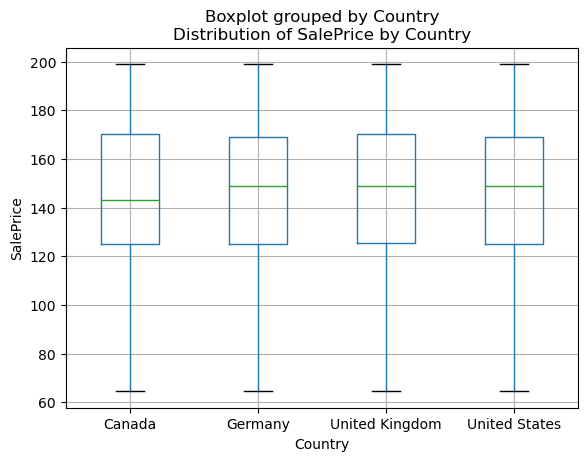

In [14]:
# Histogram of 'UnitPrice'
plt.hist(df['UnitPrice'], bins=20)
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.title('Distribution of UnitPrice')
plt.show()

# Box plot of 'SalePrice' for each 'Country'
df.boxplot(column='SalePrice', by='Country')
plt.xlabel('Country')
plt.ylabel('SalePrice')
plt.title('Distribution of SalePrice by Country')
plt.show()

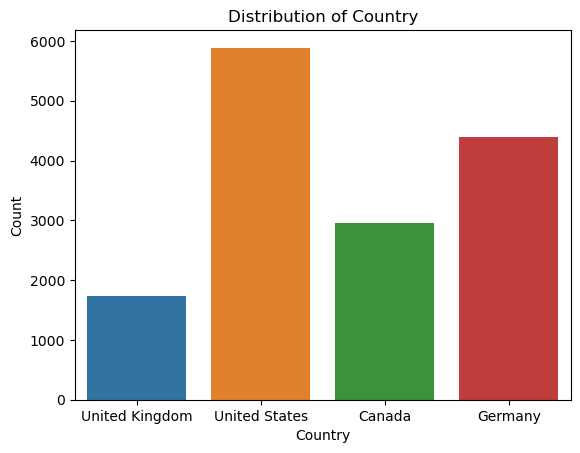

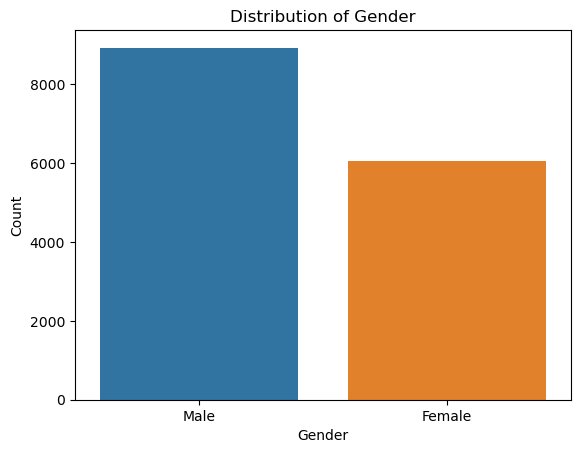

In [17]:
# Countplot of 'Country'
sns.countplot(data=df, x='Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country')
plt.show()

# Countplot of 'Gender'
sns.countplot(data=df, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

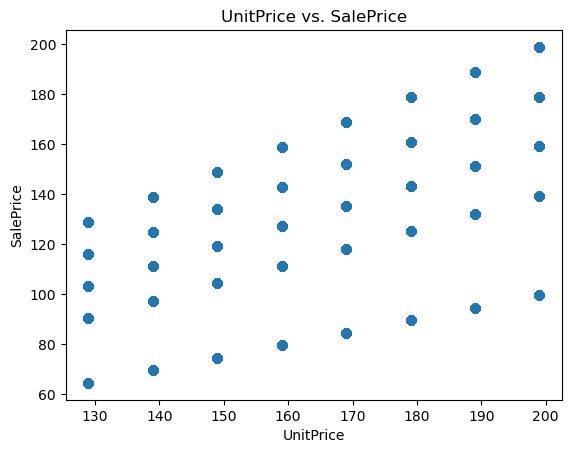

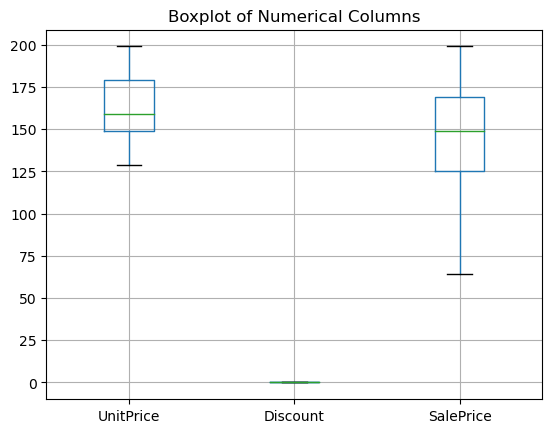

In [21]:
# Scatter plot of 'UnitPrice' vs. 'SalePrice'
plt.scatter(df['UnitPrice'], df['SalePrice'])
plt.xlabel('UnitPrice')
plt.ylabel('SalePrice')
plt.title('UnitPrice vs. SalePrice')
plt.show()

# Box plot of numerical columns to visualize outliers
num_cols = ['UnitPrice', 'Discount', 'SalePrice']
df[num_cols].boxplot()
plt.title('Boxplot of Numerical Columns')
plt.show()

In [24]:
# Calculate the frequency distribution of categorical variables
cat_cols = ['Country', 'Shop', 'Gender']
for col in cat_cols:
    freq_dist = df[col].value_counts(normalize=True)
    print(f"Frequency Distribution of {col}:")
    print(freq_dist)
    print()

Frequency Distribution of Country:
United States     0.393265
Germany           0.293446
Canada            0.197234
United Kingdom    0.116055
Name: Country, dtype: float64

Frequency Distribution of Shop:
GER2    0.130086
GER1    0.122670
US15    0.069753
US13    0.067549
US12    0.064943
CAN6    0.057527
US14    0.042293
GER3    0.040690
CAN2    0.029264
CAN3    0.029064
CAN7    0.029064
CAN5    0.027460
CAN1    0.024855
UK3     0.024855
UK4     0.023452
UK2     0.023051
UK1     0.023051
UK5     0.021648
US1     0.015634
US6     0.015033
US8     0.015033
US7     0.014833
US10    0.014432
US3     0.013830
US9     0.013029
US5     0.012828
US4     0.012026
US11    0.012026
US2     0.010022
Name: Shop, dtype: float64

Frequency Distribution of Gender:
Male      0.595911
Female    0.404089
Name: Gender, dtype: float64



# Time Series

Analyze Trends and Seasonality:

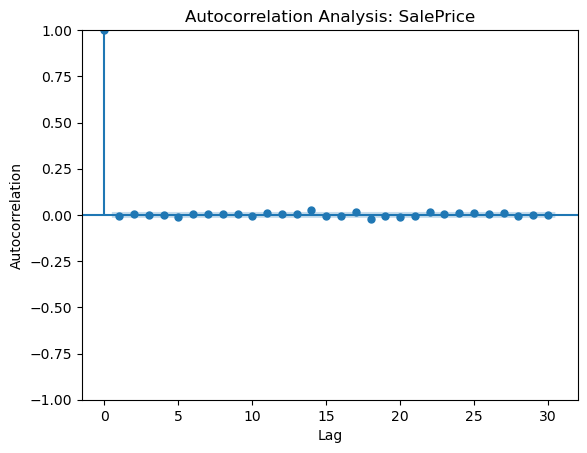

In [36]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function (ACF) to identify autocorrelation at different lags
plot_acf(df['SalePrice'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Analysis: SalePrice')
plt.show()

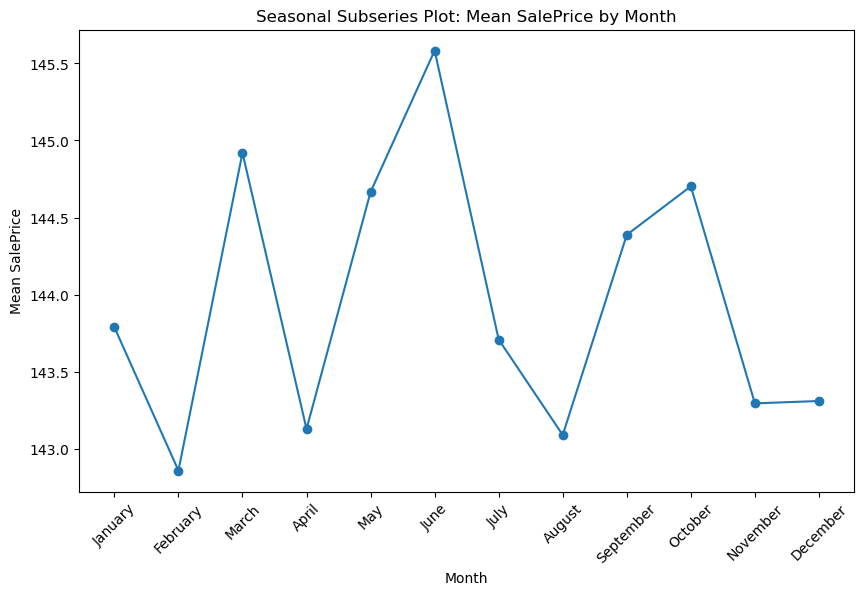

In [39]:
# Analyze Seasonal Pattern
import calendar

df = pd.read_csv("./sales_data.csv")

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract additional features from the 'Date' column if necessary (e.g., day of the week, month, year)
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group the data by month and calculate the mean 'SalePrice'
monthly_data = df.groupby(df['Date'].dt.month)['SalePrice'].mean()

# Plot the seasonal subseries plot
plt.figure(figsize=(10, 6))
monthly_data.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Mean SalePrice')
plt.title('Seasonal Subseries Plot: Mean SalePrice by Month')
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)
plt.show()

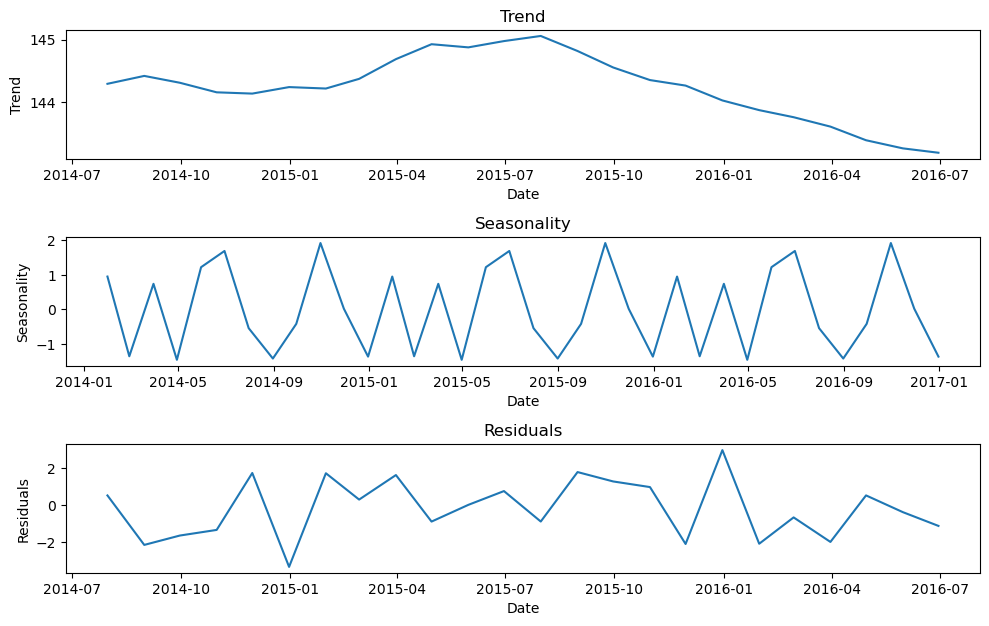

In [49]:
import statsmodels.api as sm

df = pd.read_csv("./sales_data.csv")

# Convert 'InvoiceDate' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'InvoiceDate' column as the index
df.set_index('Date', inplace=True)

# Resample the data to a fixed frequency (e.g., daily)
df_resampled = df['SalePrice'].resample('M').mean().asfreq('M')

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df_resampled, model='additive')

# Plot the decomposed components: trend, seasonal, and residuals
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(decomposition.trend)
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend')

plt.subplot(412)
plt.plot(decomposition.seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.title('Seasonality')

plt.subplot(413)
plt.plot(decomposition.resid)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [4]:
shape = df.shape
num_males = df['Gender'].value_counts()['Male']
percent_male = num_males / len(df)
avg_size = df['Size (UK)'].mean()

In [5]:
monthly_average_sales = df.groupby('Month')['SalePrice'].mean()
monthly_average_sales

Month
1     143.790226
2     142.861640
3     144.919760
4     143.130911
5     144.666213
6     145.582259
7     143.710545
8     143.092032
9     144.388671
10    144.702695
11    143.296794
12    143.312195
Name: SalePrice, dtype: float64

In [6]:
df['month_year'] = list(zip(df.Month, df.Year))
grouped = df.groupby('month_year').sum()
grouped.reset_index(inplace=True)
grouped['Month'] = grouped['month_year'].apply(lambda x:x[0])
monthly_average_sales = grouped.groupby('Month').mean()['SalePrice']
monthly_average_sales

C:\Users\kamal\AppData\Local\Temp\ipykernel_24868\1805236160.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('month_year').sum()
C:\Users\kamal\AppData\Local\Temp\ipykernel_24868\1805236160.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_average_sales = grouped.groupby('Month').mean()['SalePrice']


Month
1     50997.600000
2     50525.400000
3     52316.033333
4     57109.233333
5     60229.366667
6     67016.366667
7     67687.666667
8     66442.400000
9     66274.400000
10    69794.933333
11    55121.500000
12    54840.800000
Name: SalePrice, dtype: float64

In [7]:
grouped.head()

,month_year,InvoiceNo,ProductID,Size (US),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,"(1, 2014)",11545300,482781,2004.0,1732.0,35490,26.3,443080,1,31252.3
1,"(1, 2015)",16735741,669781,2781.0,2459.0,50365,33.7,614575,1,44805.7
2,"(1, 2016)",32036588,1182921,4885.0,4279.5,88561,70.8,1086624,1,76934.8
3,"(2, 2014)",10742084,448021,1891.0,1666.0,33426,23.5,410856,2,29612.5
4,"(2, 2015)",16988170,676594,2776.0,2433.0,50402,38.1,620620,2,44144.1


In [8]:
df_uk = df[df.Shop == 'UK2']
uk_list = np.unique(df_uk.ProductID)

df_us = df[df.Shop == 'US15']
us_list = np.unique(df_us.ProductID)

df_canada = df[df.Shop == 'CAN7']
canada_list = np.unique(df_canada.ProductID)

for i in us_list:
    if i not in uk_list:
        us_not_uk = i
        break


for i in uk_list:
    if i not in canada_list:
        uk_not_canada = i
        break

np.argmax(df.groupby("Shop")['SalePrice'].mean())
highest_price = df.groupby('Shop')['SalePrice'].mean().index[26]

In [9]:
highest_price

'US7'

In [10]:
df.groupby("Shop")['SalePrice'].mean()

Shop
CAN1    141.358871
CAN2    144.647945
CAN3    144.230345
CAN5    146.116788
CAN6    144.549129
CAN7    143.842759
GER1    143.064216
GER2    143.163790
GER3    146.427094
UK1     144.134783
UK2     144.415652
UK3     144.306452
UK4     143.800855
UK5     151.350926
US1     141.484615
US10    128.619444
US11    144.095000
US12    144.143827
US13    144.805935
US14    139.820853
US15    146.268103
US2     136.642000
US3     146.747826
US4     145.686667
US5     143.960938
US6     145.428000
US7     155.493243
US8     140.333333
US9     142.990769
Name: SalePrice, dtype: float64

## SARIMA Model

In [55]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

In [56]:
df = pd.read_csv('./sales_data.csv')
df.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [57]:
# Conver the 'Date' column to pandas timeseries

In [58]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


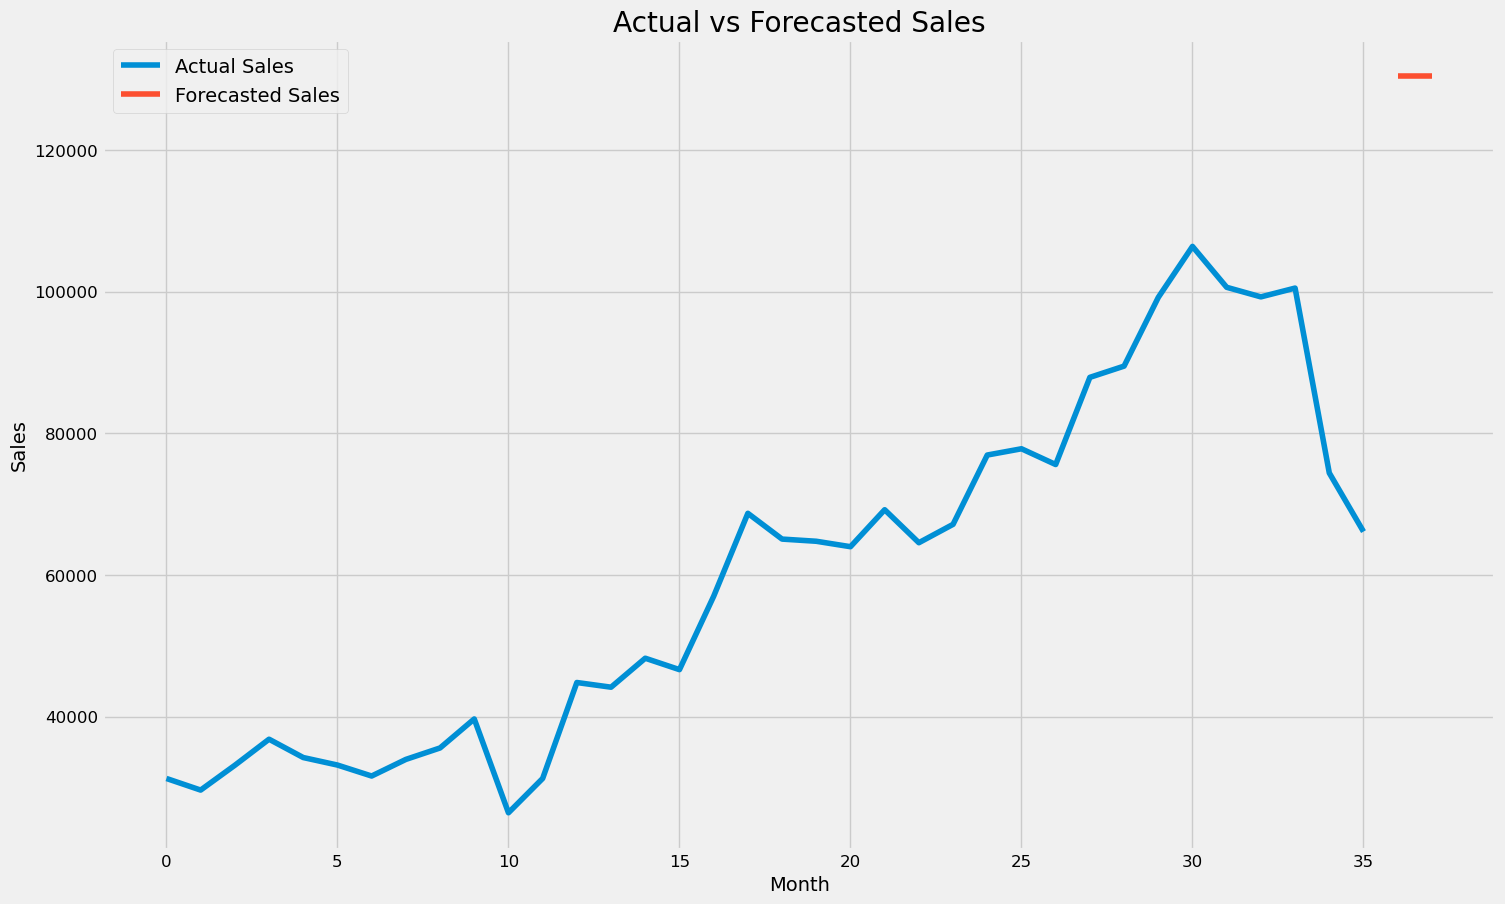

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Group the data by month and year, and calculate the sum of sales
monthly_sales = df.groupby(['Year', 'Month']).sum()['SalePrice']

# Create SARIMA model
model = SARIMAX(monthly_sales)
results = model.fit()

# Reset the index of monthly_sales
monthly_sales = monthly_sales.reset_index()

# Get the last row index in the dataset
last_row_index = monthly_sales.index[-1]

# Forecast sales for the first month of 2017
forecasted_sales = results.predict(start=last_row_index + 1, end=last_row_index + 2, dynamic=True).sum()

# Plot the predicted sales
plt.figure(figsize=(16, 10))
plt.plot(monthly_sales.index, monthly_sales['SalePrice'], label='Actual Sales')
plt.plot([last_row_index + 1, last_row_index + 2], [forecasted_sales] * 2, label='Forecasted Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Sales')
plt.legend()
plt.show()
